# Prediksi Tanaman

## Domain Proyek

Indonesia merupakan negara agraris yang sebagian besar penduduknya bekerja di sektor pertanian. Dilansir dari [Kementrian Pertanian](https://z-p42.www.instagram.com/p/CooZNrgpjE_/) sektor pertanian menjadi kontributor sebesar **13%** bagi PDB Nasional dan menjadi penghasil devisa bagi negara yang terus meningkat jumlahnya dari tahun 2020 dan 2021. Kementrian Pertanian juga menyebutkan bahwa mayoritas masyarakat Indonesia bekerja sebagai petani dan menggantungkan ekonominya di sektor tersebut.

Kesuksesan sektor pertanian dalam menyumbang pendapatan masyarakat ataupun negara tentunya tidak lepas dari produksi panen yang dihasilkan. Hasil panen ini dipengaruhi dari beberapa faktor salah satunya adalah kesesuaian antara jenis tanaman yang ditanam dengan tanahnya. Tanah yang tidak sesuai dengan tanaman yang ditanam akan menyebabkan hasil panen tidak optimal dan bahkan dapat mengalami gagal panen. Dikutip dari penelitian yang dilakukan oleh [Alfian Nur Budiarto](http://repository.uin-suska.ac.id/27846/), dengan penelitian membahas kesesuaian antara tanaman orka dengan jenis tanah dengan indikator tertentu menyimpulkan bahwa tanaman orka mengalami peningkatan produksi jumlah buah, bobot basah buah, dan panjang buah pada tanah dengan indikator tertentu.

Dengan demikian, untuk mendapatkan hasil panen yang lebih optimal dan sebagai salah satu usaha untuk meningkatkan kualitas dari hasil panen maka pemilihan jenis tanaman untuk indikator tanah tertentu menjadi penting untuk dilakukan. Dengan jenis tanah yang tepat produksi panen berpotensi lebih maksimal dan dapat meningkatkan ekonomi masyarakat ataupun negara dan kualitas panen yang dihasilkan pun lebih baik.

![Workflow Pengerjaan Proyek](https://github.com/technisekai/crop-recommendation/assets/54144923/f3ff5b0a-eb57-474f-bd51-e10cff18e861)

## Business Understanding

### Problem Statements

- Indikator apa saja pada tanah yang dapat dijadikan sebagai acuan untuk menentukan jenis tanaman yang sesuai?
- Bagaimana menerapkan algoritma Machine Learning untuk memprediksi jenis tanaman yang sesuai untuk ditanam pada tanah dengan indikator tertentu?

### Goals

- Memahami indikator pada tanah yang dapat dijadikan sebagai acuan untuk menanam jenis tanaman yang sesuai.
- Menerapkan algortima machine learning untuk memprediksi jenis tanaman yang sesuai dengan tanah.

### Solution statements
- Melakukan analsis data pada indikator data dengan melakukan visualisasi pada indikator tanah untuk menemukan korelasi antar variable.
- Menerapkan algoritma SVM dan Random Forest yang mana cocok dengan studi kasus yang diangkat dimana kedua algoritma tersebut dapat mengurangi efek yang ditimbulkan jika outlier tidak dihilangkan.

## Data Understanding

![image](https://github.com/technisekai/crop-recommendation/assets/54144923/8fce2c67-4752-4428-a997-0c935b1e4cdd)

### Variabel-variabel pada Crop Recommendation dataset adalah sebagai berikut:
- N : rasio Nitrogen yang terkandung dalam tanah. Unsur nitrogen ini berguna untuk merangsang pertumbuhan tanaman secara keseluruhan, khususnya batang, cabang dan daun
- P : rasio fosfor pada tanah yang memiliki manfaat untuk merangsang pertumbuhan akar, terutama akar lateral dan akar rambut
- K : rasio potasium atau disebut juga kalium pada tanah. Dengan adanya kalium ini menyebabkan terjaminnya ketegaran tanaman, merangsang pertumbuhan akar, mencegah serangan hama dan penyakit, memperbaiki kualitas bulir, serta mengatasi kekurangan air
- temperature : temperatur lingkungan pada sekitar tanah dalam satuan C.
- humidity : kelembaban pada tanah.
- ph : nilai pH pada tanah
- rainfall : curah hujan di sekitar tanah dalam satuan mm
- label : jenis tanaman yang mana terdapat 22 jenis tanaman

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Exploratory Data Analysis (EDA)

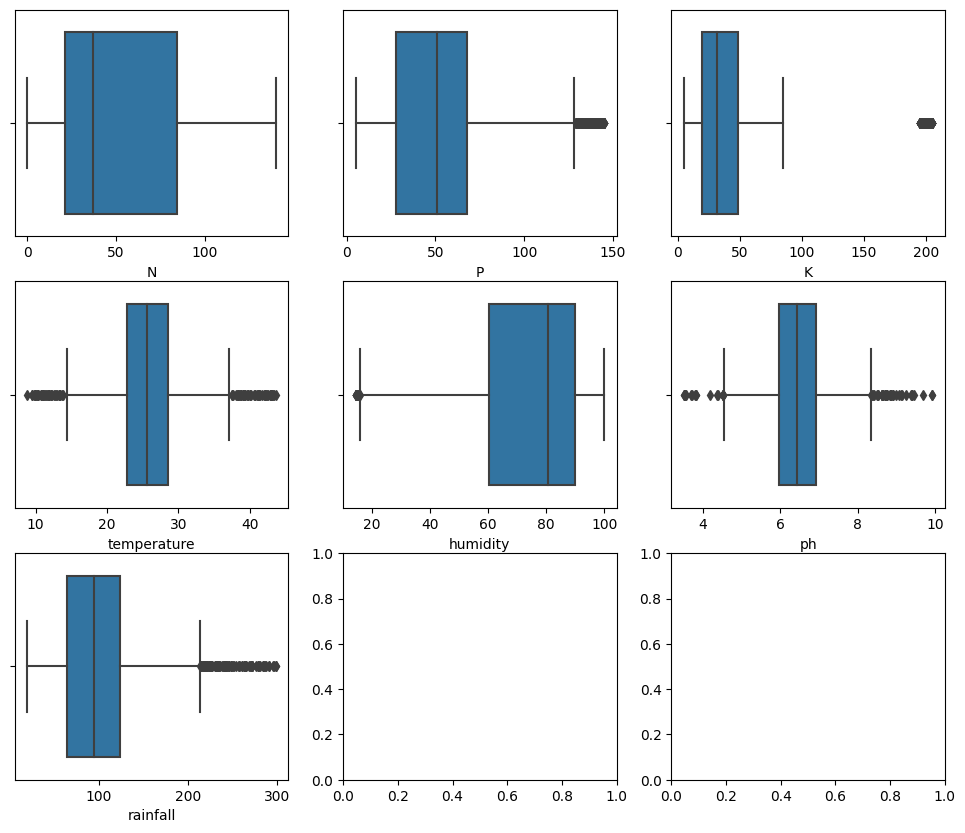

In [ ]:
plt.rcParams["figure.figsize"] = (12, 10)
fig, axes = plt.subplots(nrows=3 , ncols=3)
columns = df.columns

i, j = 0, 0
for column in columns:
  if j > 2:
    j = 0
    i += 1
  try:
    sns.boxplot(x=df[column], ax=axes[i, j])
    j += 1
  except:
    pass

**Outliers Analysis**

In [5]:
import warnings
warnings.filterwarnings("ignore")

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
clean_df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
clean_df.shape

(1768, 8)

In [6]:
lost_data = (df.shape[0] - clean_df.shape[0])/df.shape[0]
print('Data yang dihapus sekitar: {data}%'.format(data=lost_data*100))

Data yang dihapus sekitar: 19.636363636363637%


*Dataset memiliki outliers pada kolom P, K, temperature, humidity, ph,	rainfall namun ketika outliers tersebut dihapus data yang hilang sebesar 19% dari keseluruhan data yang mana jumlah tersebut cukup besar. Sehingga diputuskan untuk tetap mempertahankan outlier.*

**imbalanced data analysis**

<Axes: title={'center': 'Jumlah Label pada Dataset'}, xlabel='Tanaman', ylabel='Jenis Jumlah'>

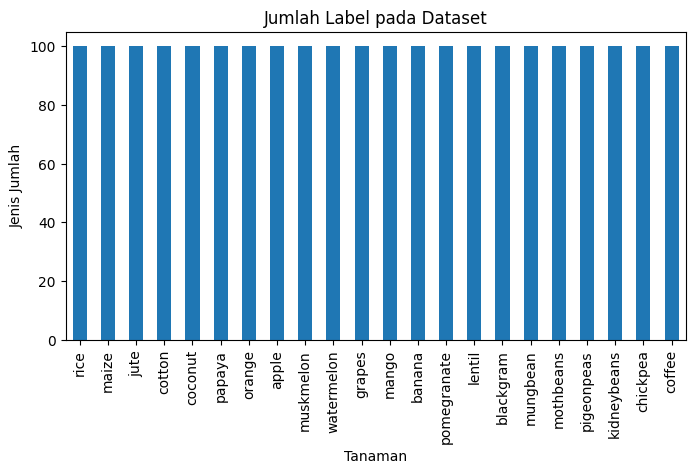

In [ ]:
plt.rcParams["figure.figsize"] = (8, 4)
df['label'].value_counts().plot(kind='bar', title="Jumlah Label pada Dataset", xlabel='Tanaman', ylabel='Jenis Jumlah')

*Terdapat 22 jenis tanaman pada dataset dan memiliki jumlah yang sama yaitu 100. Sehingga dataset termasuk balanced*

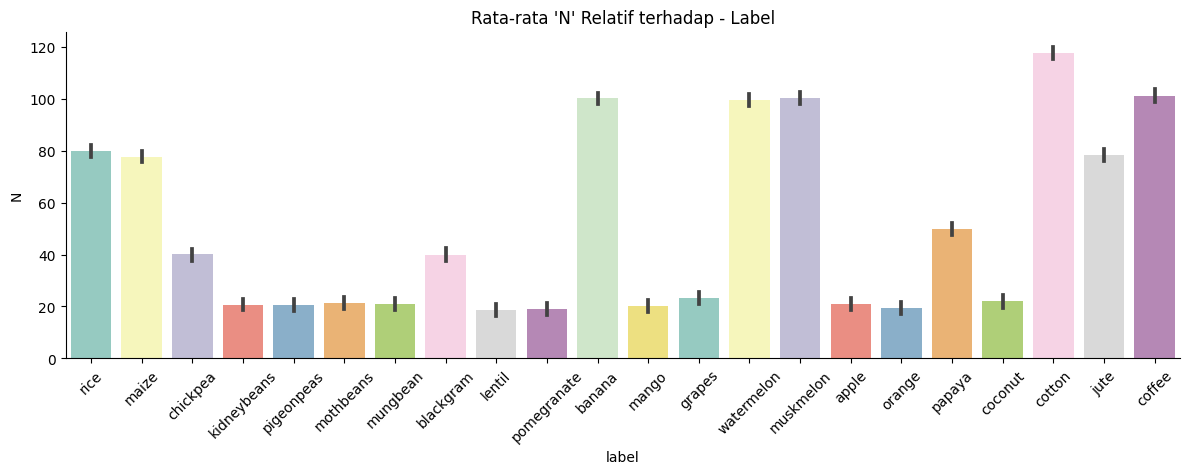

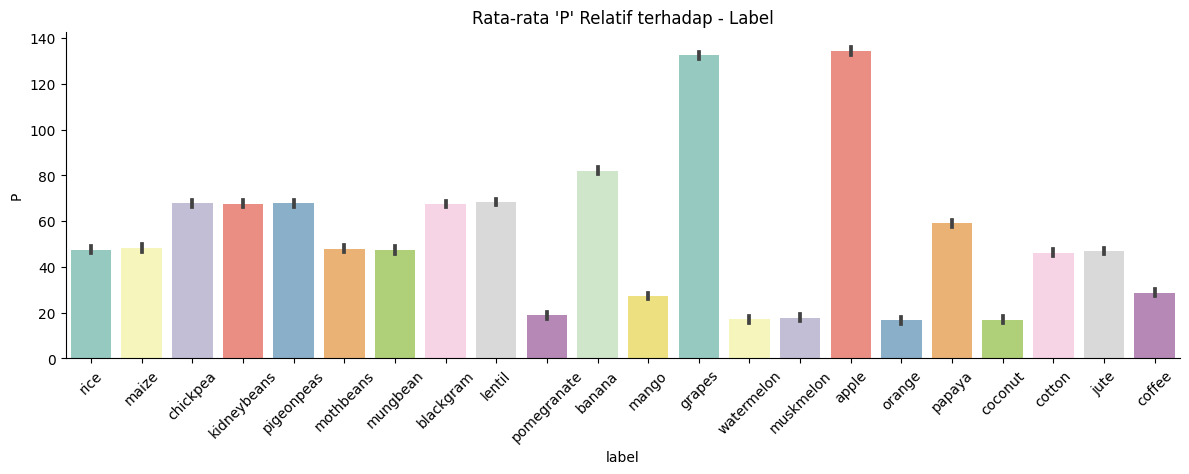

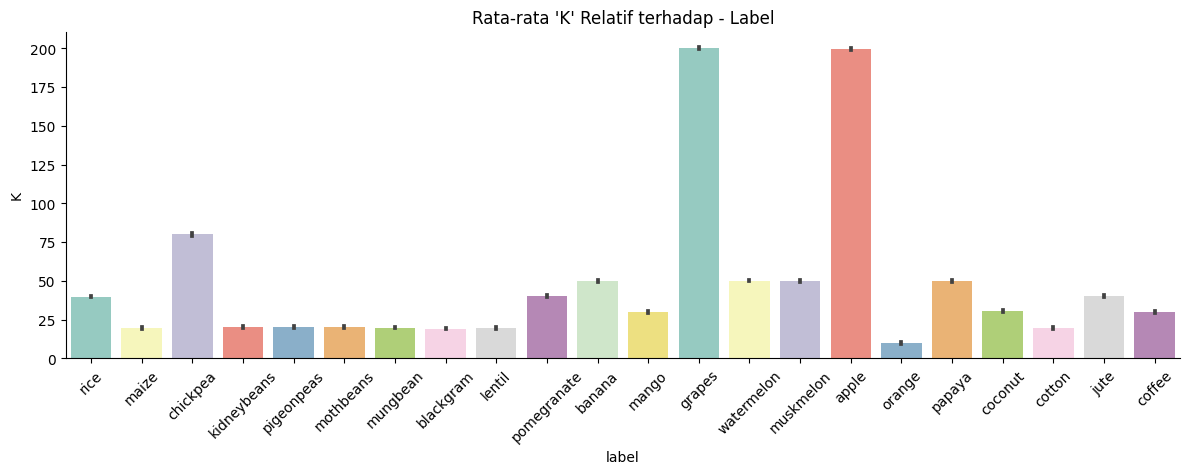

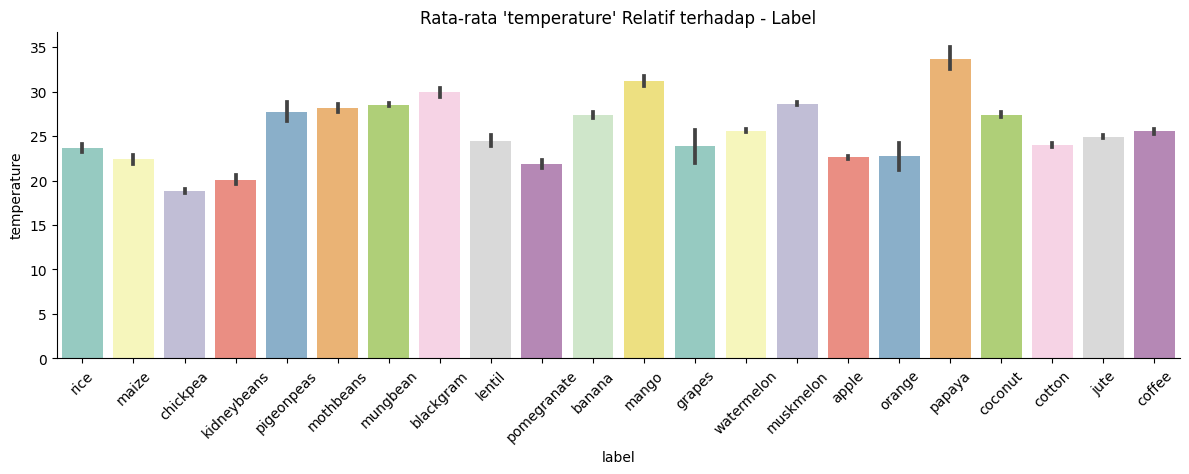

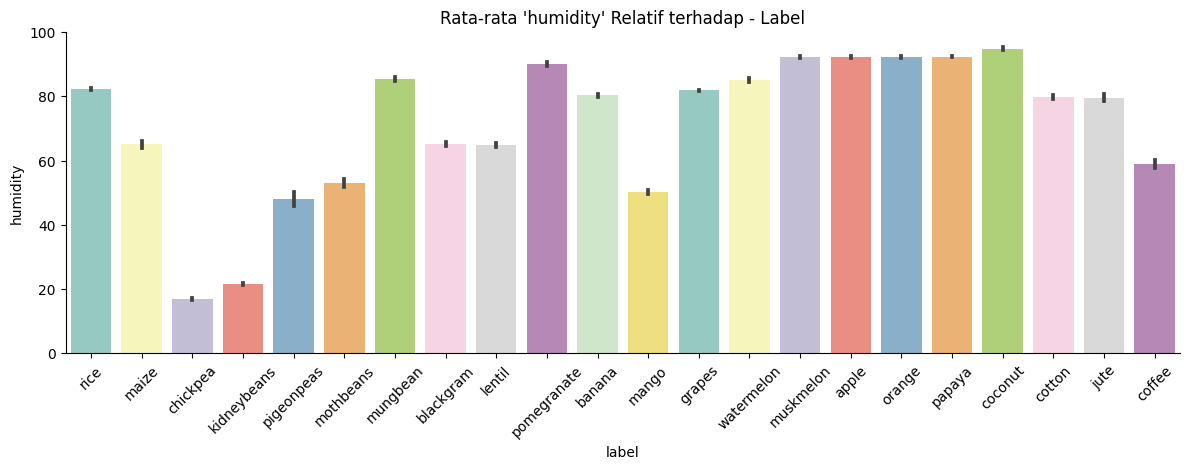

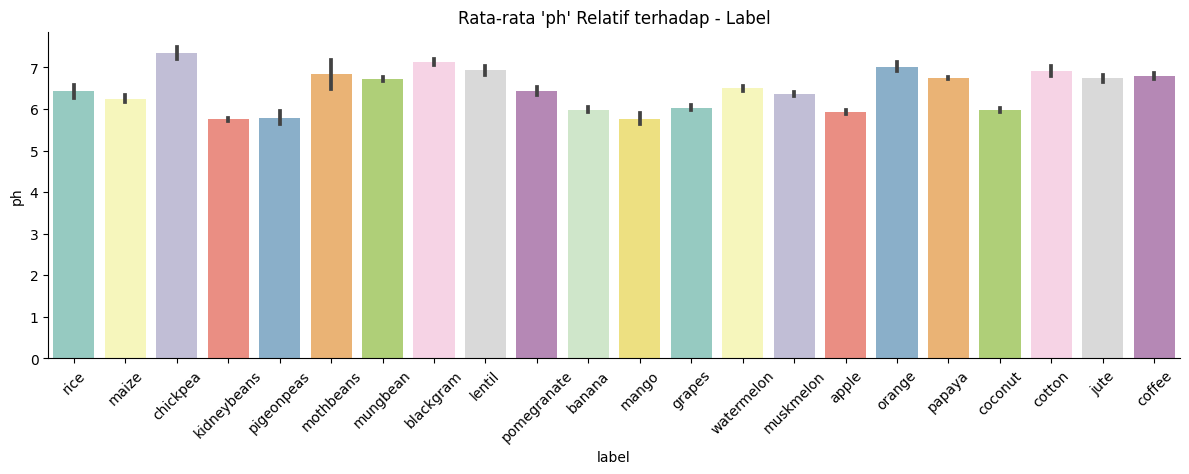

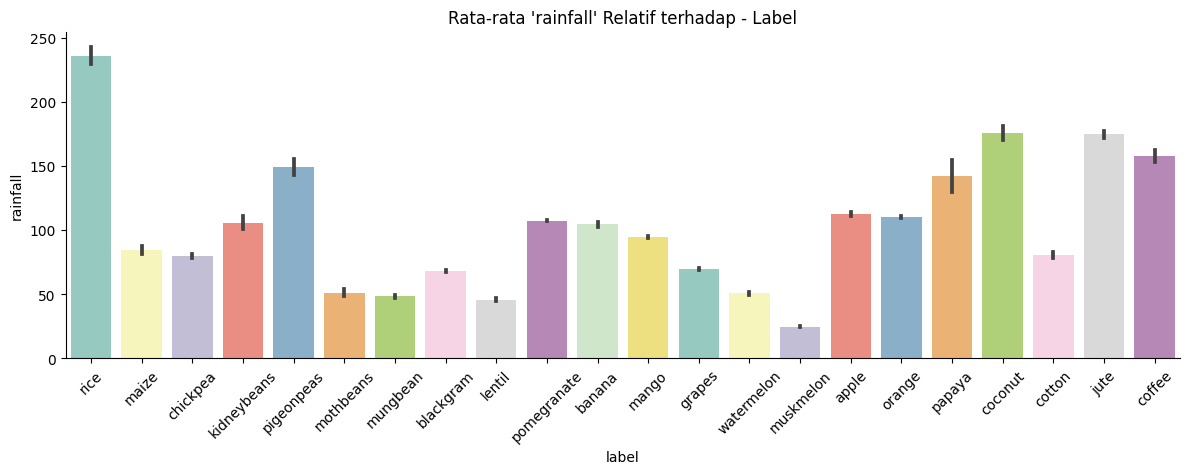

In [ ]:
series_features = df.select_dtypes(exclude='object').columns.to_list()
 
for col in series_features:
  plot = sns.catplot(x='label', y=col, kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plot.set_xticklabels(rotation=45)
  plt.title("Rata-rata '{}' Relatif terhadap - Label".format(col))

*pada kolom ph dan temperature, hasil rata-ratanya pada masing-masing jenis tanaman cenderung sama sehingga fitur ini kurang berpengaruh terhadap jenis tanaman yang ditanam. Tanaman membutuhkan nilai N, P, K, humidity, dan rainfall yang berbeda untuk bisa hidup*

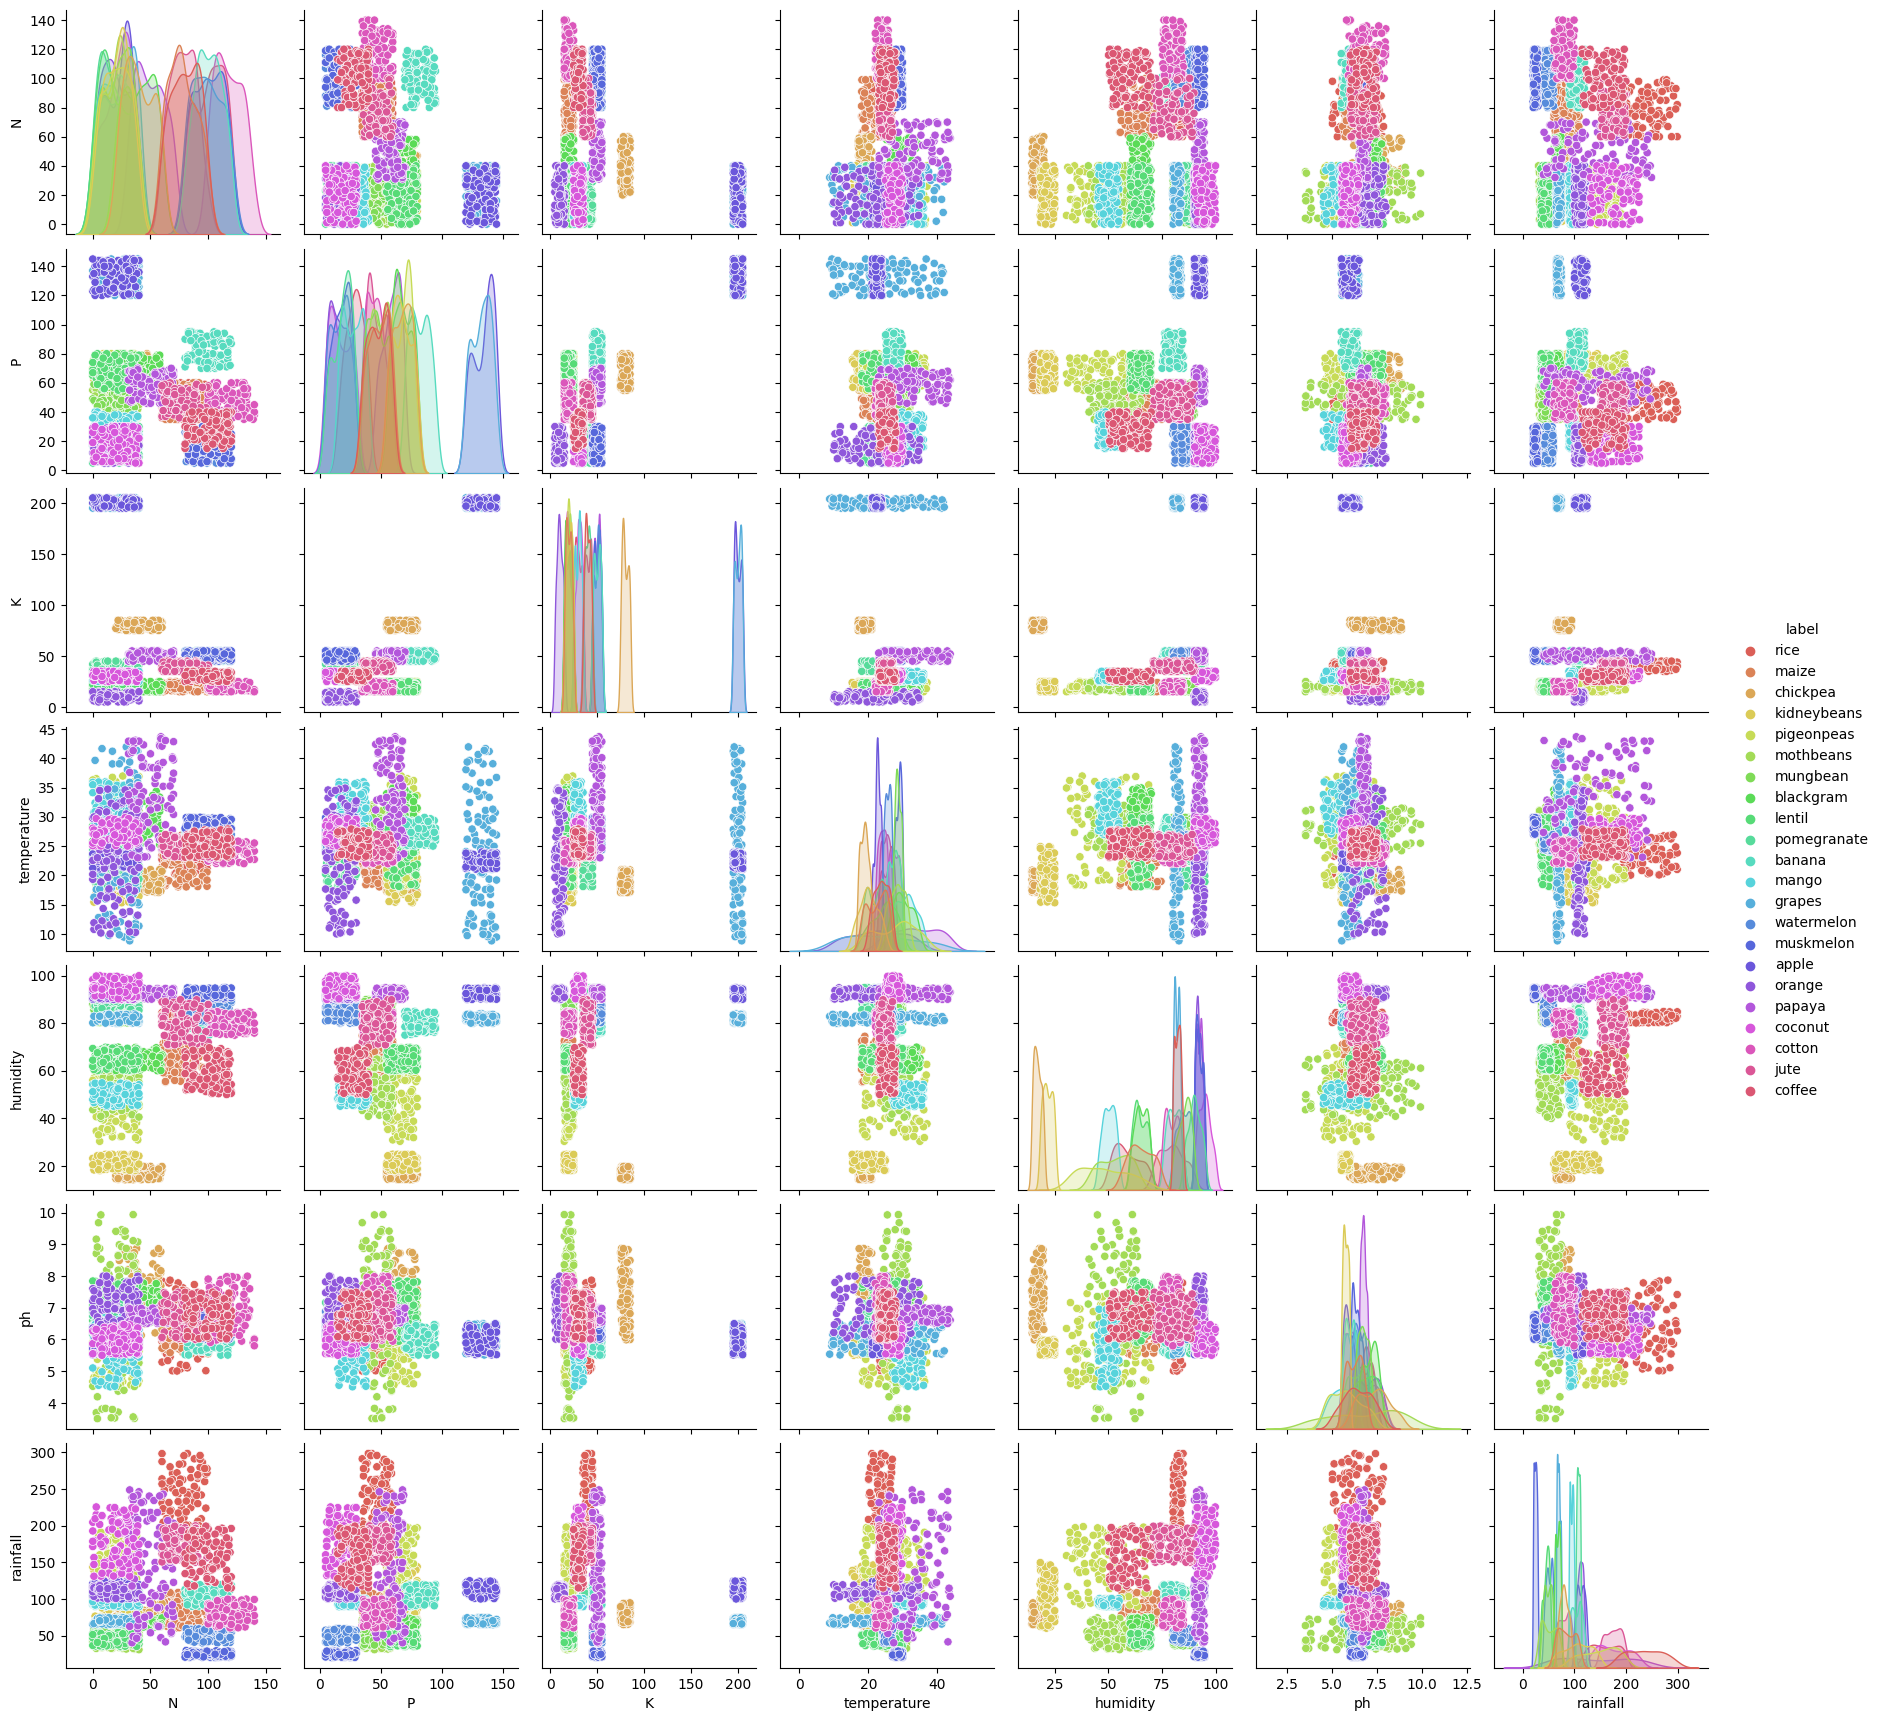

In [ ]:
sns.pairplot(df, hue="label", palette="hls")

*Dari antar fitur yang divisualisasikan menggunakan pairplot, masing-masing fitur memiliki korelasi yang rendah antar fiturnya*

## Data Preparation

Kolom label masih berbentuk object sehingga perlu dikonversi ke bentuk numerik. Dataset tidak memiliki missing value namun memiliki outlier di beberapa kolom. Dikarenakan jika nilai outlier tersebut akan mengurangi data sebanyak 19% maka diputuskan untuk tetap mempertahankan nilai outlier tersebut. Dan ketika melakukan normalisasi dengan masih adanya outlier akan memungkinkan memperbesar dampak dari outlier tersebut. Sehingga di tahap ini dicoba untuk hanya mengubah label ke numerik.

In [ ]:
label_names = pd.factorize(df['label'])
df['label_num'] = label_names[0]
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [ ]:
label_names = pd.factorize(clean_df['label'])
clean_df['label_num'] = label_names[0]
clean_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice,0
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice,0
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice,0
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice,0


## Model Development

Pada tahap ini, dipilih algoritma random forest dan svm. Dari beberapa sumber, algoritma ini dapat mengurangi efek dari outlier sehingga cocok dengan dataset yang digunakan sekarang

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
X = df.drop(columns=["label", "label_num"], axis =1)
y = df["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
classifiers = {
               'Random Forest Classifier': RandomForestClassifier(),
               'Support Vector Classifier': SVC(),
               }
log_cols = ["algorithm", "accuracy", "precision", "recall", "f1-score"]
result_metrics = pd.DataFrame(columns=log_cols)

In [ ]:
from sklearn import metrics as m

for algorithm, algorithm_obj in classifiers.items():
  classification = algorithm_obj.fit(X_train, y_train)
  y_out = classification.predict(X_test)
  accuracy = m.accuracy_score(y_test, y_out)
  precision = m.precision_score(y_test, y_out, average='macro')
  recall = m.recall_score(y_test, y_out, average='macro')
  f1_score = m.f1_score(y_test, y_out, average='macro')
  result_metrics = result_metrics.append({"algorithm": algorithm, "accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1_score}, ignore_index=True)

In [ ]:
result_metrics

,algorithm,accuracy,precision,recall,f1-score
0,Random Forest Classifier,0.997727,0.997835,0.997326,0.997514
1,Support Vector Classifier,0.981818,0.981591,0.979456,0.979410


## Evaluasi

In [ ]:
X = clean_df.drop(columns=["label", "label_num"], axis =1)
y = clean_df["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn import metrics as m

for algorithm, algorithm_obj in classifiers.items():
  classification = algorithm_obj.fit(X_train, y_train)
  y_out = classification.predict(X_test)
  accuracy = m.accuracy_score(y_test, y_out)
  precision = m.precision_score(y_test, y_out, average='macro')
  recall = m.recall_score(y_test, y_out, average='macro')
  f1_score = m.f1_score(y_test, y_out, average='macro')
  result_metrics = result_metrics.append({"algorithm": algorithm+' + outlier removal', "accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1_score}, ignore_index=True)

In [ ]:
result_metrics

,algorithm,accuracy,precision,recall,f1-score
0,Random Forest Classifier,0.997727,0.997835,0.997326,0.997514
1,Support Vector Classifier,0.981818,0.981591,0.979456,0.979410
2,Random Forest Classifier + outlier removal,0.988701,0.990700,0.977778,0.982694
3,Support Vector Classifier + outlier removal,0.974576,0.934124,0.940357,0.935808


*Model Random Forest dan SVM berhasil mencapai akurasi yang sangat baik di atas 95%. Namun yang terbaik diperoleh oleh model Random Forest dengan akurasi 99%. Disini dilakukan juga eksperimen dengan melatih algoritma Random Forest dan SVM dengan data yang sudah dihilangkan _outliersnya_. Namun, model Random Forest dan SVM yang sudah dihilangkan _outliersnya_ mengalami penurunan performa sebesar 1% pada 4 metrik yang digunakan sehingga dapat disimpulkan bahwa menghilangkan _outliers_ sebesar 19% dari keseluruhan data memiliki dampak pada performa model sebesar 1% yang mana berarti penghilangan _outliers_ tidak selalu menghasilkan hasil yang baik bagi performa model.*